In [1]:
import sys
import os
from os.path import join
import cv2
import torch
import numpy as np
import pandas as pd
import pickle as pkl
from PIL import Image
from tqdm.auto import tqdm, trange
import seaborn as sns
import matplotlib.pyplot as plt
sys.path.append("/n/home12/binxuwang/Github/DiffusionObjectRelation/utils")
from cv2_eval_utils import find_classify_object_masks

positive_threshold = 180 

In [2]:
saveroot = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/results/objrel_rndembdposemb_DiT_B_pilot/latent_store"
figdir = '/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/results/objrel_rndembdposemb_DiT_B_pilot/Figure_latent_feature_heatmap'
syndir = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/results/objrel_rndembdposemb_DiT_B_pilot/synopsis"
os.makedirs(syndir, exist_ok=True)

### Collect all layers features

In [5]:
syn_col = []
feature_names = [
    "obj_vs_others",
    "triangle_vs_others", 
    "circle_vs_others",
    "square_vs_others", 
    "blue_obj_vs_others",
    "red_obj_vs_others",
    "red_circle_vs_others",
    "red_square_vs_others",
    "red_triangle_vs_others", 
    "blue_circle_vs_others", 
    "blue_square_vs_others",
    "blue_triangle_vs_others",
    "topobj_vs_others", 
    "bottomobj_vs_others",
    "topobj_vs_bottomobj"
]
# annot_label = "triangle_vs_others"
for layer_index in [0, 2, 4, 5, 7, 8, 9, 11]:
    for annot_label in feature_names:
        for t_index in reversed(range(14)):
            for training_pass in [("cond",), ("uncond",), ("cond", "uncond")]:
                training_pass_str = "-".join(training_pass)+"Pass"
                if not os.path.exists(join(figdir, f"red_blue_8_relation_diff_layer{layer_index}_t{t_index}_{annot_label}_classifier_{training_pass_str}.pkl")):
                    print(f"No classifier found for at layer {layer_index} t_index {t_index} {annot_label} and training pass {training_pass_str}")
                    continue
                data = pkl.load(open(join(figdir, f"red_blue_8_relation_diff_layer{layer_index}_t{t_index}_{annot_label}_classifier_{training_pass_str}.pkl"), 'rb'))
                clf, boundary_vector, eval_dict = data["classifier"], data["boundary_vector"], data["eval_dict"]
                stats_dict = eval_dict.copy()
                stats_dict["layer_index"] = layer_index
                stats_dict["t_index"] = t_index
                stats_dict["training_pass"] = training_pass_str
                stats_dict["annot_label"] = annot_label
                stats_dict["boundary_vector"] = boundary_vector
                # stats_dict.pop('classifier')
                # stats_dict.pop('boundary_vector')
                syn_col.append(stats_dict)
            # print(f"t_index: {t_index}, training_pass: {training_pass_str}, eval_dict: {eval_dict}")
            # print(f"boundary_vector: {boundary_vector}")
syn_df = pd.DataFrame(syn_col)
# syn_df.to_csv(join(figdir, f"red_blue_8_relation_diff_stats_synopsis.csv"), index=False)
syn_df.to_pickle(join(syndir, f"red_blue_8_relation_feature_classifier_alllayers_stats_synopsis.pkl"))


In [6]:
join(syndir, f"red_blue_8_relation_feature_classifier_alllayers_stats_synopsis.pkl")

'/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/results/objrel_rndembdposemb_DiT_B_pilot/synopsis/red_blue_8_relation_feature_classifier_alllayers_stats_synopsis.pkl'

In [3]:
syn_col = []
feature_names = [
    "obj_vs_others",
    "triangle_vs_others", 
    "circle_vs_others",
    "square_vs_others", 
    "blue_obj_vs_others",
    "red_obj_vs_others",
    "red_circle_vs_others",
    "red_square_vs_others",
    "red_triangle_vs_others", 
    "blue_circle_vs_others", 
    "blue_square_vs_others",
    "blue_triangle_vs_others",
    "topobj_vs_others", 
    "bottomobj_vs_others",
    "topobj_vs_bottomobj"
]
# annot_label = "triangle_vs_others"
missing_collection = []
for layer_index in [0, 2, 4, 5, 7, 8, 9, 11]:
    for annot_label in feature_names:
        for t_index in reversed(range(14)):
            for training_pass in [("cond",), ("uncond",), ("cond", "uncond")]:
                training_pass_str = "-".join(training_pass)+"Pass"
                if not os.path.exists(join(figdir, f"red_blue_8_relation_diff_layer{layer_index}_t{t_index}_{annot_label}_classifier_{training_pass_str}.pkl")):
                    # print(f"No classifier found for at layer {layer_index} t_index {t_index} {annot_label} and training pass {training_pass_str}")
                    missing_collection.append({"layer_index": layer_index, "t_index": t_index, "annot_label": annot_label, "training_pass": training_pass_str})
                else:
                    continue
missing_df = pd.DataFrame(missing_collection)
# missing_df.to_csv(join(syndir, f"red_blue_8_relation_feature_classifier_missing_stats_synopsis.csv"), index=False)

In [4]:
len(missing_df)

0

In [8]:
missing_df.groupby(['layer_index', 't_index']).count()

annot_label  training_pass
layer_index t_index                            
0           0                  6              6
            1                  1              1
            10                18             18
2           0                 28             28
5           0                  7              7
7           0                  3              3
8           10                 9              9
11          0                 26             26

In [10]:
missing_df.groupby(['layer_index', 't_index']).count()

annot_label  training_pass
layer_index t_index                            
0           0                 45             45
            1                 45             45
            2                 23             23
            4                 45             45
            5                  3              3
            7                 42             42
            10                45             45
            11                40             40
2           0                 45             45
            1                 31             31
            4                 34             34
            10                27             27
4           0                 44             44
            4                  4              4
            7                 24             24
            10                45             45
            11                 8              8
5           0                 45             45
            1                 16             16
            4                 20             20
            7                  1              1
            10                28             28
7           0                 45             45
            1                  6              6
            10                 3              3
8           0                 45             45
            1                 12             12
            4                 13             13
            7                 29             29
            10                45             45
            11                15             15
9           0                 45             45
            1                 13             13
            4                 13             13
            7                  6              6
            10                37             37
11          0                 45             45
            1                 27             27
            4                 24             24
            7                 45             45
            8                  1              1
            10                45             45
            11                45             45
            12                13             13

### Accuracy as function of layer

In [3]:
syn_df = pd.read_pickle(join(syndir, f"red_blue_8_relation_feature_classifier_alllayers_stats_synopsis.pkl"))

In [4]:
syn_df.head()

,classifier,train_score,test_score,confusion_matrix,precision,recall,f1_score,layer_index,t_index,training_pass,annot_label,boundary_vector
0,"LogisticRegression(fit_intercept=False, n_jobs...",0.990571,0.991309,"[[45395, 222], [220, 5018]]",0.957634,0.957999,0.957816,0,13,condPass,obj_vs_others,"[0.002273016999946044, -0.051105543005860864, ..."
1,"LogisticRegression(fit_intercept=False, n_jobs...",0.990650,0.991427,"[[45401, 216], [220, 5018]]",0.958731,0.957999,0.958365,0,13,uncondPass,obj_vs_others,"[0.0010989264339000477, -0.05186880359316734, ..."
2,"LogisticRegression(fit_intercept=False, n_jobs...",0.991021,0.990837,"[[90486, 511], [421, 10291]]",0.952694,0.960698,0.956679,0,13,cond-uncondPass,obj_vs_others,"[0.004836655845866137, -0.05108525649727972, 0..."
3,"LogisticRegression(fit_intercept=False, n_jobs...",0.986324,0.987514,"[[45294, 323], [312, 4926]]",0.938464,0.940435,0.939449,0,12,condPass,obj_vs_others,"[-0.00029182366018646016, -0.06666577832295292..."
4,"LogisticRegression(fit_intercept=False, n_jobs...",0.986407,0.987494,"[[45294, 323], [313, 4925]]",0.938453,0.940244,0.939348,0,12,uncondPass,obj_vs_others,"[-0.0014599791001494058, -0.06846035445222629,..."


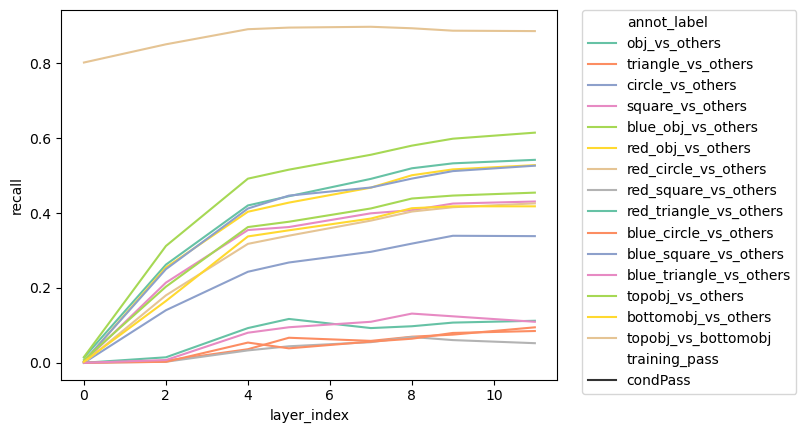

In [8]:
sns.lineplot(data=syn_df.query("t_index == 4 and training_pass == 'condPass'"), x="layer_index", y="recall", 
             style="training_pass", hue="annot_label", palette="Set2")
# put legend outside
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


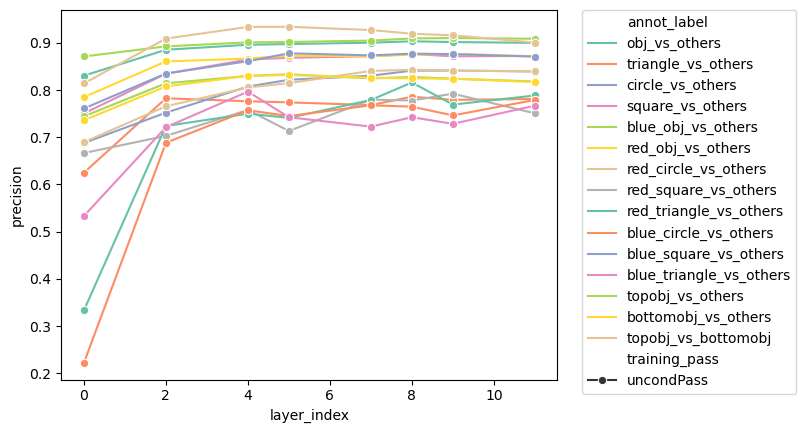

In [19]:
sns.lineplot(data=syn_df.query("t_index == 8 and training_pass == 'uncondPass'"), x="layer_index", y="precision", 
             style="training_pass", hue="annot_label", palette="Set2", markers=True)
# put legend outside
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


In [15]:
syn_df.query("t_index == 8 and training_pass == 'uncondPass' and layer_index == 2").\
    set_index("annot_label")["recall"].sort_values()

annot_label
blue_circle_vs_others      0.244216
red_square_vs_others       0.267218
red_triangle_vs_others     0.473171
triangle_vs_others         0.501393
blue_triangle_vs_others    0.642336
circle_vs_others           0.658421
square_vs_others           0.738270
bottomobj_vs_others        0.746796
topobj_vs_others           0.763827
red_circle_vs_others       0.778481
red_obj_vs_others          0.841601
blue_square_vs_others      0.841837
obj_vs_others              0.861779
blue_obj_vs_others         0.884008
topobj_vs_bottomobj        0.915016
Name: recall, dtype: float64

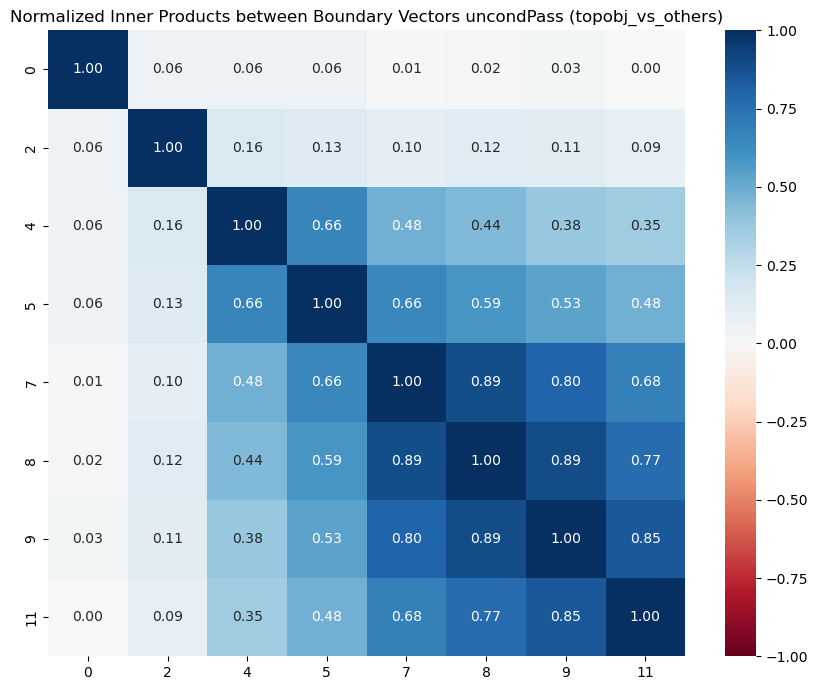

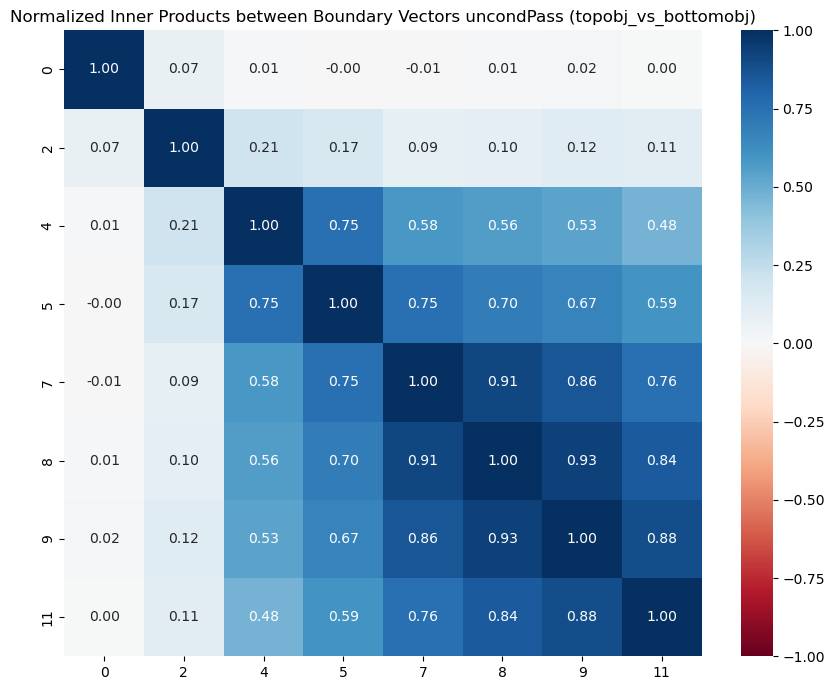

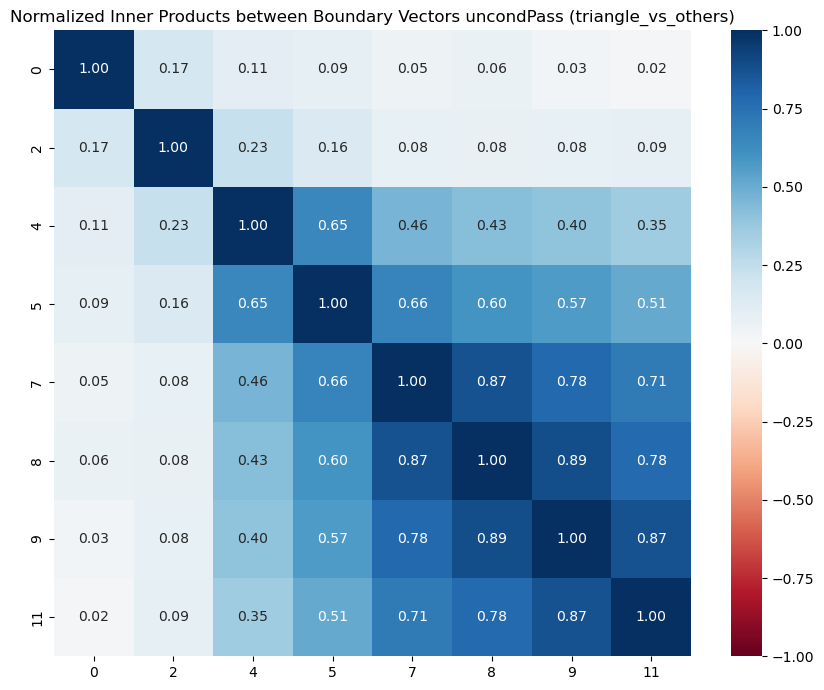

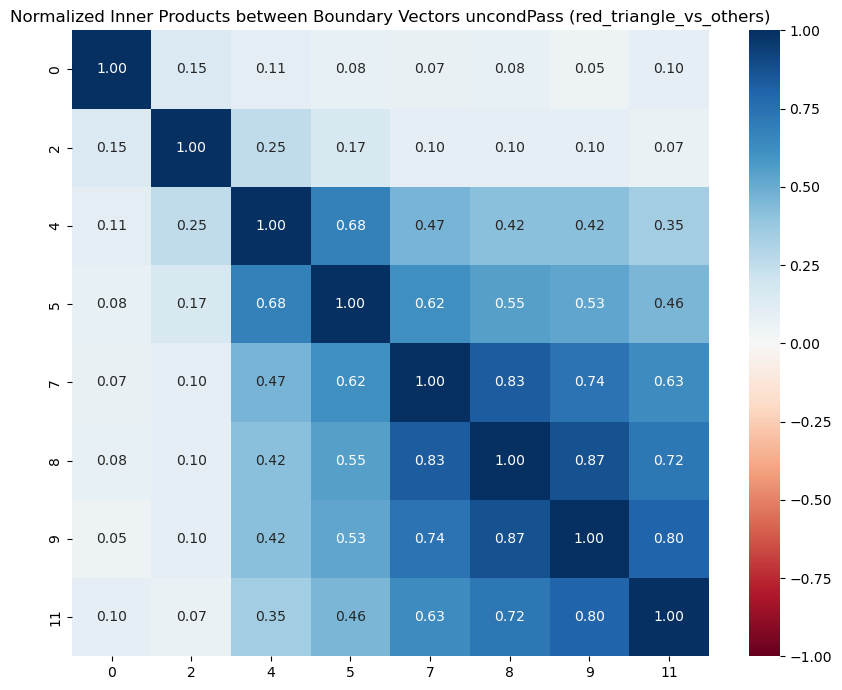

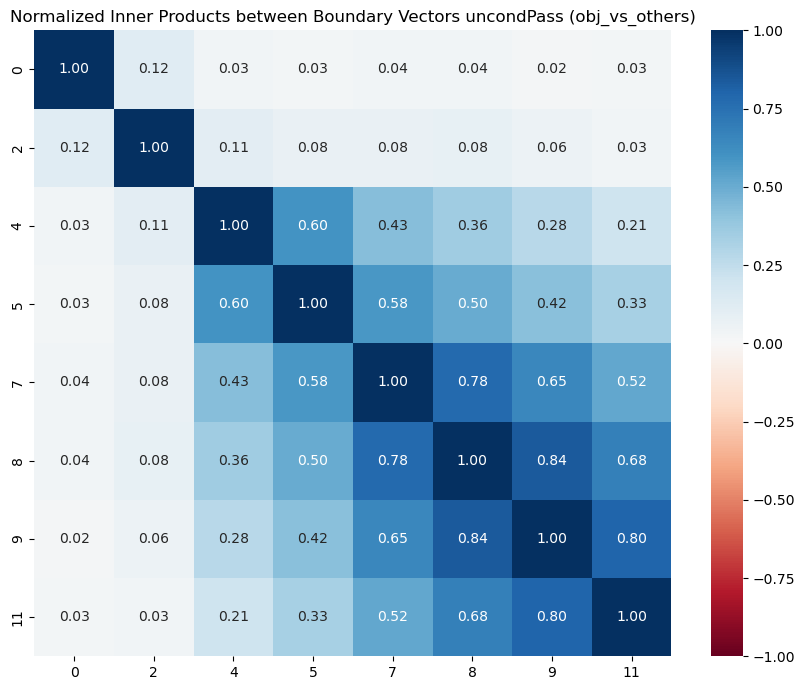

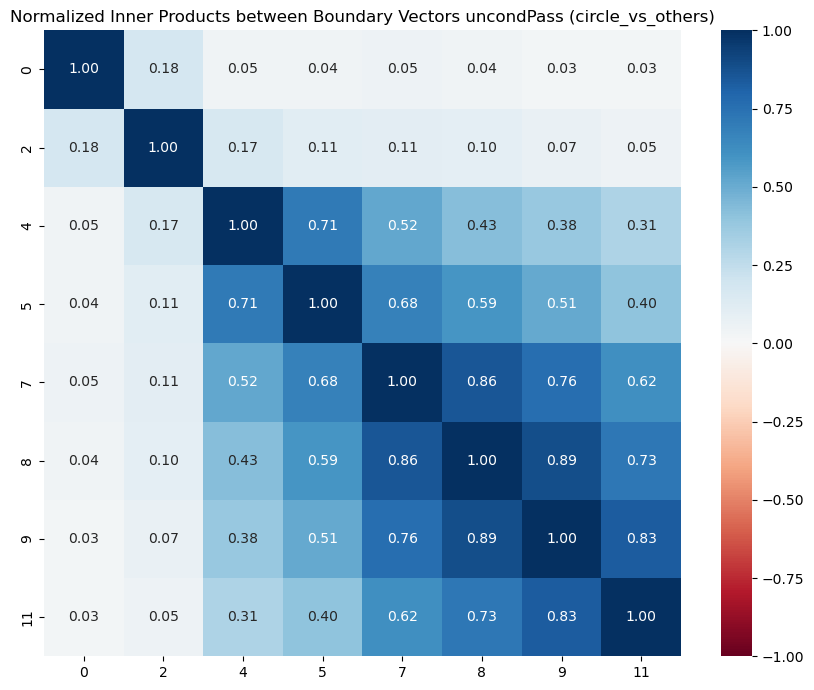

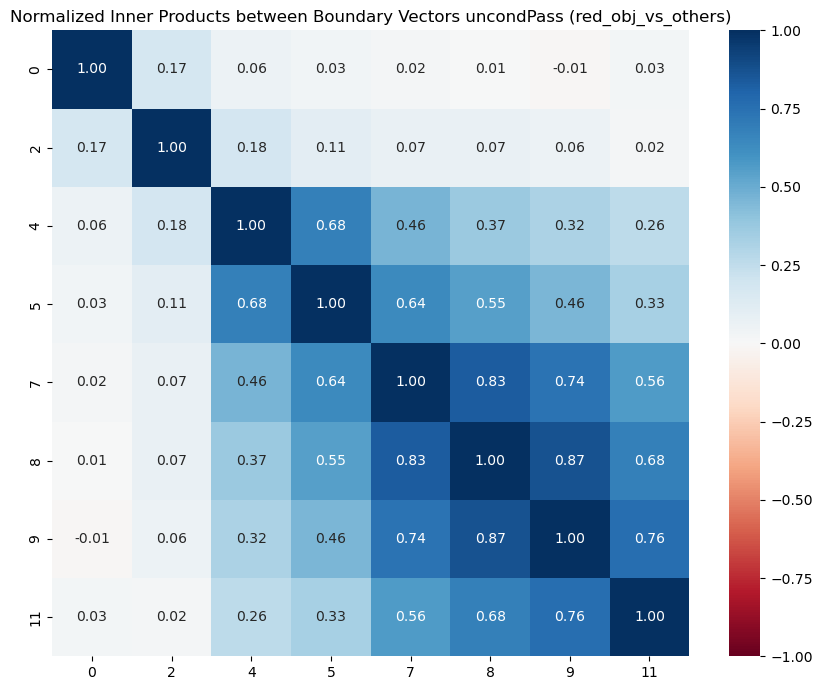

In [18]:
# Compute inner products between boundary vectors for each t_index
# Filter data for current t_index and cond-uncondPass
for annot_label in ["topobj_vs_others", "topobj_vs_bottomobj", 
                    "triangle_vs_others", "red_triangle_vs_others",
                    "obj_vs_others", "circle_vs_others", "red_obj_vs_others"]:
    df_subsel = syn_df.query("annot_label == @annot_label and training_pass == 'condPass' and t_index == 4")
    df_subsel = df_subsel.sort_values(by="layer_index")
    # Extract boundary vectors and labels
    vectors = np.stack(df_subsel['boundary_vector'].values)
    labels = df_subsel['layer_index'].values

    # Compute normalized inner products
    norm_vectors = vectors / np.linalg.norm(vectors, axis=1)[:, None]
    inner_products = norm_vectors @ norm_vectors.T

    # Create heatmap
    plt.figure(figsize=(8.5, 7))
    sns.heatmap(inner_products, 
                xticklabels=labels, 
                yticklabels=labels,
                annot=True, 
                fmt='.2f',
                cmap='RdBu',
                vmin=-1, 
                vmax=1,
                center=0)
    plt.title(f'Normalized Inner Products between Boundary Vectors uncondPass ({annot_label})')
    plt.tight_layout()
    plt.show()

### Normalize and scale and shift the feature vectors

In [22]:
import sys
sys.path.append("/n/home12/binxuwang/Github/DiffusionObjectRelation/PixArt-alpha")
from diffusion import IDDPM
from diffusion.data.builder import build_dataset, build_dataloader, set_data_root
from diffusion.model.builder import build_model
from diffusion.utils.misc import set_random_seed, read_config, init_random_seed, DebugUnderflowOverflow
sys.path.append("/n/home12/binxuwang/Github/DiffusionObjectRelation/utils")
from pixart_utils import state_dict_convert
from pixart_utils import construct_diffuser_transformer_from_config
from pixart_utils import construct_diffuser_transformer_from_config, construct_diffuser_pipeline_from_config

/n/home12/binxuwang/.conda/envs/torch2/lib/python3.10/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


In [26]:
savedir = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/DL_Projects/PixArt/results/objrel_rndembdposemb_DiT_B_pilot"
ckptdir = join(savedir, "checkpoints")
config = read_config(join(savedir, 'config.py'))
model = construct_diffuser_transformer_from_config(config)
ckpt = torch.load(join(ckptdir, "epoch_4000_step_160000.pth"))
model.load_state_dict(state_dict_convert(ckpt['state_dict_ema']))
model.eval()
model.to("cpu");

In [36]:
with torch.no_grad():
    t_blocks, t_embs = model.adaln_single(torch.arange(1000), 
                       added_cond_kwargs={'resolution': None, 'aspect_ratio':None})


In [44]:
layer_index = 1
with torch.no_grad():
    scale_shift_table = model.transformer_blocks[layer_index].scale_shift_table
    B = t_blocks.shape[0]
    shift_msa_src, scale_msa_src, gate_msa_src, \
    shift_mlp_src, scale_mlp_src, gate_mlp_src = \
    (scale_shift_table[None, :, :] + t_blocks.reshape(B, 6, -1)).chunk(6, dim=1)
print(scale_shift_table.shape)
print(shift_msa_src.shape)

torch.Size([6, 768])
torch.Size([1000, 1, 768])


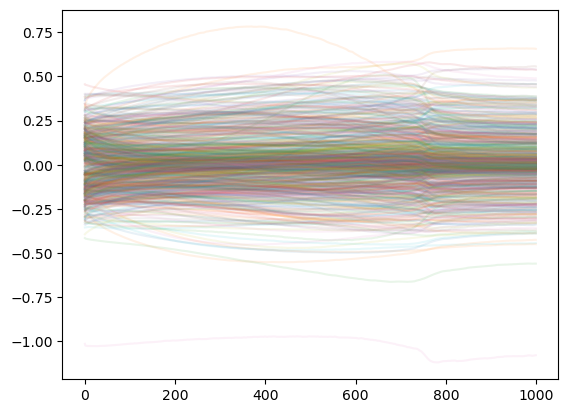

In [52]:
plt.plot(shift_msa_src[:, 0, :].\
    cpu().numpy(), alpha=0.1)
plt.show()

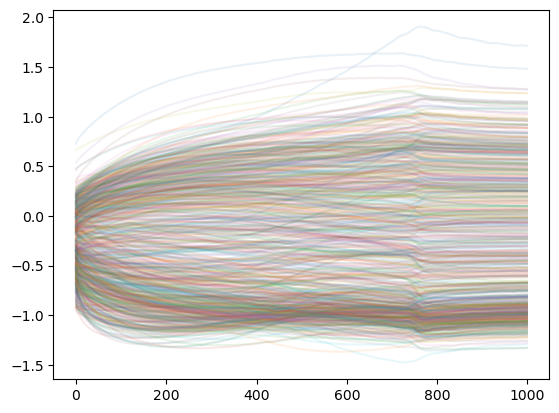

In [51]:
plt.plot(scale_msa_src[:, 0, :].cpu().numpy(), alpha=0.1)
plt.show()

In [47]:
print(t_blocks.shape)
print(t_embs.shape)

torch.Size([1000, 4608])
torch.Size([1000, 768])


In [63]:
import torch.nn as nn
norm_layer = nn.LayerNorm(768, eps=1e-5, elementwise_affine=False)

In [60]:
# Check the layernorm layer has no learnable parameters
model.transformer_blocks[layer_index].norm1.state_dict()

OrderedDict()

In [61]:
model.transformer_blocks[layer_index].norm1

LayerNorm((768,), eps=1e-06, elementwise_affine=False)